# <img style="float: left; padding: 0px 10px 0px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg/1920px-Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg.png"  width="80" /> IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Semestre 2022-2**<br>
**Profesora:** Paula Aguirre <br>

## Tarea 2: Extracción de Datos desde la Web.

---

    
## Instrucciones Generales.

- Fecha de entrega: 26 de septiembre de 2022, 23:59.

- Vía de entrega: GitHub

- Esta Tarea debe desarrollarse de manera totalmente *individual*, de acuerdo a lo establecido en la sección de Integridad Académica en el programa del curso.

- La Tarea debe ser desarrollada en lenguaje de programación Python y en formato Jupyter Notebook.

- El desarrollo del Notebook debe ser claro y ordenado, incluyendo anotaciones (markdown) y comentarios que permitan seguir fácilmente el código y los pasos implementados, y siguiendo buenas prácticas de programación. La presentación y claridad del notebook y código forman parte de la evaluación de la tarea.

- Se sugiere hacer consultas y comentarios sobre la Tarea a traves del Foro del curso en Canvas.


## 1. Webscrapping.

¿Se ha preguntado cómo es el mercado laboral para analistas o cientistas de datos en Chile? Este ejercicio tiene como objetivo generar un conjunto de datos que permita dar algunas respuestas a esta pregunta. 

Para ello, ud. realizará scrapping del portal de empleos https://www.trabajando.cl, para extraer la información de todas las ofertas laborales que se encuentran mediante búsqueda de la palabra clave `data` (u otra que le parezca más apropiada para este fin).


Se sugiere seguir los siguientes pasos:

**1.** Explore la página web de Trabajando, y realice mánualmente la búsqueda. Inspeccione el código fuente de la página de resultados.

**2.** Implemente un código para realizar automáticamente la búsqueda, y extraer los datos de *todos* los anuncios encontrados en la página de resultados. El objetivo es generar un dataframe con las siguietnes columnas:

|id|titulo_anuncio | empresa | ubicacion| estudios_mininos | años_experiencia |
| --- | --- | --- |--- |--- |--- |
|   |   |   |  |  |  |


In [1]:
import requests 
import pandas
from bs4 import BeautifulSoup as bs
import re

url='https://www.trabajando.cl/trabajo-empleo/data/ttCryGW2FegAic35Q6eOW-yLBxnPdEEsPaBU-ToDe5TGjd_WofyRLGydVd8jnC8iu1FE0EINCtnTyx1kwhjw_A'

html=requests.get(url).text
soup=bs(html)

In [2]:
results=soup.find('div',class_='resultado_busquedas_listado_contenedor')
regex = re.compile('.*col-md-12 resultado_busquedas_listado_oferta d-flex flex-column.*')
jobs=results.find_all('div',class_=regex)


In [3]:
for job in jobs:
    print(job.get('id'))
    job_id=job.get('id').split('_')[-1]
    job_url=url.replace('data','data/trabajo/%s'%job_id)
    
    job_html=requests.get(job_url).text

    
#title=jobs[0].a.get('title').strip()
#company=jobs[0].find('div',class_="col-md-12 no-padding resultado_busquedas_listado_oferta_descripcion_empresa").text.strip()



offerItem_5335614
offerItem_5333992
offerItem_5330510
offerItem_5338051
offerItem_5338016
offerItem_5337999
offerItem_5337826
offerItem_5337546
offerItem_5337652
offerItem_5337444
offerItem_5337545
offerItem_5336814
offerItem_5337360
offerItem_5336647
offerItem_5333410
offerItem_5332164
offerItem_5336343
offerItem_5336029
offerItem_5335415
offerItem_5335406


In [4]:
job_bs=bs(job_html)

In [5]:
job_url

'https://www.trabajando.cl/trabajo-empleo/data/trabajo/5335406/ttCryGW2FegAic35Q6eOW-yLBxnPdEEsPaBU-ToDe5TGjd_WofyRLGydVd8jnC8iu1FE0EINCtnTyx1kwhjw_A'

### 2. Acceso a datos via API


En este ejercicio uds. trabajará con la API del Banco Mundial para extraer datos relativos a indicadores de desarrollo sustentable para latinoamérica. De acuerdo a la descripción oficial, 

"*The World Bank Indicators API provides access to almost **16,000 time series indicators**, most of which are available online through tools such as Databank and the Open Data website. The API gives developers unified access to over 45 databases including World Development Indicators, International Debt Statistics, Doing Business, Human Capital Index, and Subnational Poverty. Many of the available data series go back more than 50 years*"

La documentación completa de la API puede encontrarse en el siguiente link: <br>
https://datahelpdesk.worldbank.org/knowledgebase/articles/889392-about-the-indicators-api-documentation

Además, el catálogo de datos permite buscar e identificar los indicadores disponibles en la API:

https://datacatalog.worldbank.org/search?q=&sort=last_updated_date%20desc

El objetivo específico es generar un conjunto de datos para analizar las emisiones de dióxido de carbono (CO2) para los países de sudamérica, desde el año 2000 a la fecha. Para ello, siga los siguientes pasos:

**1.** Explore y lea cuidadosamente la documentación de la API, y familiarízese con el catálogo de datos.


**2.** Identifique dentro de la base de datos el indicador correspondiente a la emisiones anuales de CO2 por país.

**indicator=CO2 emissions (kt) (EN.ATM.CO2E.KT).**

Otros:
- CO2 emissions (kg per 2010 US of GDP)
- CO2 emissions (kg per PPP  of GDP)
- CO2 emissions (kg per 2017 PPP  of GDP)
- CO2 emissions (metric tons per capita)


**3.** Implemente un código para extraer los datos indicados y generar un único dataframe para todos países y rango de fechas indicado, con la siguiente estructura:

|id_pais|nombre_pais | año | emisiones_CO2|
| --- | --- | --- |--- |
|   |   |   |  |


In [6]:
import requests
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
url='http://api.worldbank.org/v2/country'
#
countries=requests.get(url,params={'format':'json','region':'LCN'}).json()
df_countries=pd.json_normalize(countries[1])


In [8]:
sac=['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia','Ecuador', 
     'Guyana','Peru','Paraguay', 'Suriname','Uruguay', 'Venezuela, RB']
df_sac=df_countries[df_countries['name'].isin(sac)].reset_index(drop=True)
df_sac.id

0     ARG
1     BOL
2     BRA
3     CHL
4     COL
5     ECU
6     GUY
7     PER
8     PRY
9     SUR
10    URY
11    VEN
Name: id, dtype: object

In [9]:
url=' http://api.worldbank.org/v2/indicator'

#indicator=CO2 emissions (kt) (EN.ATM.CO2E.KT)
indicator='EN.ATM.CO2E.KT'

params={'format':'json'}
url="http://api.worldbank.org/v2/country/"

alldf=[]
for country in df_sac.id:
    query=url+country+'/indicator/%s?date=2000:2022'%indicator
    print(query)
    response=requests.get(query,params=params)
    jdata=response.json()
    df=pd.json_normalize(jdata[1])
    alldf.append(df)

http://api.worldbank.org/v2/country/ARG/indicator/EN.ATM.CO2E.KT?date=2000:2022
http://api.worldbank.org/v2/country/BOL/indicator/EN.ATM.CO2E.KT?date=2000:2022
http://api.worldbank.org/v2/country/BRA/indicator/EN.ATM.CO2E.KT?date=2000:2022
http://api.worldbank.org/v2/country/CHL/indicator/EN.ATM.CO2E.KT?date=2000:2022
http://api.worldbank.org/v2/country/COL/indicator/EN.ATM.CO2E.KT?date=2000:2022
http://api.worldbank.org/v2/country/ECU/indicator/EN.ATM.CO2E.KT?date=2000:2022
http://api.worldbank.org/v2/country/GUY/indicator/EN.ATM.CO2E.KT?date=2000:2022
http://api.worldbank.org/v2/country/PER/indicator/EN.ATM.CO2E.KT?date=2000:2022
http://api.worldbank.org/v2/country/PRY/indicator/EN.ATM.CO2E.KT?date=2000:2022
http://api.worldbank.org/v2/country/SUR/indicator/EN.ATM.CO2E.KT?date=2000:2022
http://api.worldbank.org/v2/country/URY/indicator/EN.ATM.CO2E.KT?date=2000:2022
http://api.worldbank.org/v2/country/VEN/indicator/EN.ATM.CO2E.KT?date=2000:2022


In [10]:
df=pd.concat(alldf,ignore_index=True)
df=df[['country.id','country.value','date','value']]
df

,country.id,country.value,date,value
0,AR,Argentina,2021,NaN
1,AR,Argentina,2020,NaN
2,AR,Argentina,2019,168100.006104
3,AR,Argentina,2018,176899.993896
4,AR,Argentina,2017,179320.007324
...,...,...,...,...
259,VE,"Venezuela, RB",2004,139610.000610
260,VE,"Venezuela, RB",2003,135770.004272
261,VE,"Venezuela, RB",2002,140750.000000
262,VE,"Venezuela, RB",2001,135800.000000


**4.** Genere un gráfico con las series de tiempo de emisiones de CO2 para los cinco países más contaminantes de la región.

In [15]:
pv=pd.pivot_table(df,index='country.id',values='value',aggfunc='mean').sort_values(by='value',ascending=False)
pv

,value
country.id,
BR,392988.497009
AR,160462.001862
VE,149444.001404
CL,69111.500244
CO,66925.999512
PE,41909.499928
EC,33436.999931
BO,15151.999987
UY,6323.500021


In [12]:
top5=['BR','AR','VE','CL','CO']
dftop5=df[df['country.id'].isin(top5)]
dftop5

,country.id,country.value,date,value
0,AR,Argentina,2021,NaN
1,AR,Argentina,2020,NaN
2,AR,Argentina,2019,168100.006104
3,AR,Argentina,2018,176899.993896
4,AR,Argentina,2017,179320.007324
...,...,...,...,...
259,VE,"Venezuela, RB",2004,139610.000610
260,VE,"Venezuela, RB",2003,135770.004272
261,VE,"Venezuela, RB",2002,140750.000000
262,VE,"Venezuela, RB",2001,135800.000000


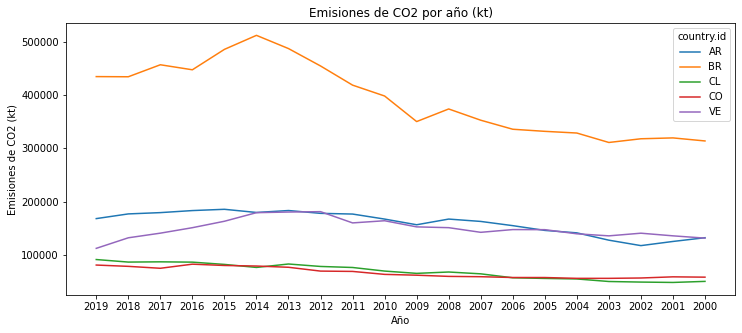

In [13]:
import seaborn as sns

fig=plt.figure(figsize=(12,5))
ax=fig.add_subplot(111)
ax.set_title('Emisiones de CO2 por año (kt)')
ax.set_xlabel('Año')
ax.set_ylabel('Emisiones de CO2 (kt)')
sns.lineplot(data=dftop5,x='date',y='value',hue='country.id');